<a href="https://colab.research.google.com/github/varnikaaavyas/Time-Series-Analysis/blob/main/Autoregressive_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf

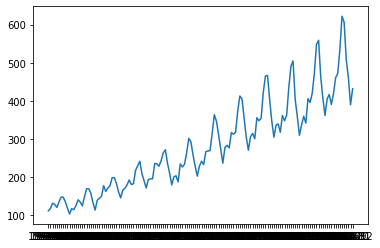

In [ ]:
df = pd.read_csv("/content/AirPassengers.csv")
df
df.rename(columns={'#Passengers': 'Passengers'}, inplace=True)
plt.plot(df.Month, df.Passengers)

**QUESTION 2.**

In [ ]:
def adk_kpss(series):

  result = adfuller(series, autolag= 'AIC')
  print("Result of ADF")
  print(f'ADF Statistics: {result[0]}')
  print(f'n-lags: {result[1]}')
  print(f'p_value:{result[1]}')
  for key, value in result[4].items():
    print('Critical Values:')
    print(f'{key},{value}')

  if(result[1]>0.05):
    print("Non-Stationary")
  else:
    print("Stationary")


  kpsstest = kpss(series)
  kpss_output =pd.Series(kpsstest[0:3],index=['Test Statistic','p-value','Lags'])
  print("Result of KPSS")

  for key, value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key]= value


  if(kpsstest[0]<0.05):
    print("Non-Stationary")
  else:
    print("Stationary")


  if((result[1]>0.05) and (kpsstest[1]<0.05)):
    print("*Final Result = Non-Stationary*")
  elif ((result[1]<0.05) and (kpsstest[1]>0.05)):
    print("*Final Result = Stationary*")
  elif ((result[1]>0.05) and (kpsstest[1]>0.05)):
    print("*Final Result = Trend Stationary*")
  else:
    print("*Final Result = Differenece Stationary*")


**Converting the non-stationary dataset into stationary dataset**

In [ ]:
df['log_trans']=np.log(df['Passengers'])
df


,Month,Passengers,log_trans
0,1949-01-01,112,4.718499
1,1949-02-01,118,4.770685
2,1949-03-01,132,4.882802
3,1949-04-01,129,4.859812
4,1949-05-01,121,4.795791
...,...,...,...
139,1960-08-01,606,6.406880
140,1960-09-01,508,6.230481
141,1960-10-01,461,6.133398
142,1960-11-01,390,5.966147


In [ ]:
n=1
df['diff_trend']=df['log_trans'].diff(periods =n)
df['diff_trend'].dropna()
df['rolling_mean_trend']=df['diff_trend'].rolling(window=1).mean()

In [ ]:
s=12
df['diff_sea']=df['rolling_mean_trend'].diff(periods =s)
df['diff_sea'].dropna()
df['rolling_mean_sea']=df['diff_sea'].rolling(window=s).mean()
df

,Month,Passengers,log_trans,diff_trend,rolling_mean_trend,diff_sea,rolling_mean_sea
0,1949-01-01,112,4.718499,NaN,NaN,NaN,NaN
1,1949-02-01,118,4.770685,0.052186,0.052186,NaN,NaN
2,1949-03-01,132,4.882802,0.112117,0.112117,NaN,NaN
3,1949-04-01,129,4.859812,-0.022990,-0.022990,NaN,NaN
4,1949-05-01,121,4.795791,-0.064022,-0.064022,NaN,NaN
...,...,...,...,...,...,...,...
139,1960-08-01,606,6.406880,-0.026060,-0.026060,-0.045934,-0.001738
140,1960-09-01,508,6.230481,-0.176399,-0.176399,0.012024,-0.003630
141,1960-10-01,461,6.133398,-0.097083,-0.097083,0.031830,-0.000075
142,1960-11-01,390,5.966147,-0.167251,-0.167251,-0.050082,-0.006714


In [ ]:
series = df.loc[:, 'Passengers'].values
series = df.loc[:, 'rolling_mean_sea'].dropna()

print(adk_kpss(series))


Result of ADF
ADF Statistics: -2.9520835830228442
n-lags: 0.03961800040163491
p_value:0.03961800040163491
Critical Values:
1%,-3.492995948509562
Critical Values:
5%,-2.888954648057252
Critical Values:
10%,-2.58139291903223
Stationary
Result of KPSS
Stationary
*Final Result = Stationary*
None


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [ ]:
fig = px.line(df, x='Month', y='rolling_mean_sea')
fig.show()

**PACF**

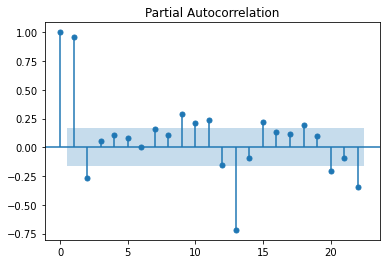

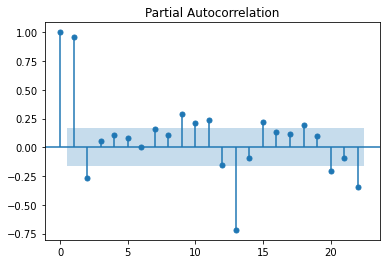

In [ ]:
plot_pacf(df['Passengers'])
# P-vlaue is 2

In [ ]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.regression.linear_model import yule_walker

In [ ]:
rho ,sigma =yule_walker(df['Passengers'],2,method ='mle')
print(f'rho ( value of phi coeffiecient): {-rho}')
print(f'sigma (Value of Constant): {sigma}')

rho ( value of phi coeffiecient): [-1.16555014  0.22942187]
sigma (Value of Constant): 37.01762481202474


**QUESTION 3.**

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

In [ ]:
X = df["Passengers"]
train, test = X[1:int(0.8*len(X))], X[len(X) - int(0.2*len(X)):]


In [ ]:
model = AutoReg(train, lags=35)

model_fit = model.fit()

print('Coefficients:', model_fit.params)

Coefficients: intercept         5.487295
Passengers.L1     0.672580
Passengers.L2     0.178072
Passengers.L3     0.009533
Passengers.L4    -0.032505
Passengers.L5     0.346360
Passengers.L6    -0.143566
Passengers.L7    -0.032464
Passengers.L8    -0.156543
Passengers.L9     0.164451
Passengers.L10   -0.416488
Passengers.L11    0.140907
Passengers.L12    0.663342
Passengers.L13   -0.310857
Passengers.L14   -0.248388
Passengers.L15    0.298894
Passengers.L16   -0.292053
Passengers.L17   -0.043614
Passengers.L18    0.025268
Passengers.L19    0.055876
Passengers.L20   -0.171653
Passengers.L21    0.180547
Passengers.L22    0.022953
Passengers.L23    0.256456
Passengers.L24    0.119426
Passengers.L25   -0.089024
Passengers.L26   -0.345736
Passengers.L27    0.022323
Passengers.L28   -0.009820
Passengers.L29   -0.046646
Passengers.L30   -0.219674
Passengers.L31    0.287921
Passengers.L32    0.047097
Passengers.L33   -0.089554
Passengers.L34    0.193971
Passengers.L35   -0.017178
dtype: float64

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/ar_model.py:248: FutureWarning:

The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 



In [ ]:
predictions = model_fit.predict(start =len(train), end=len(train)+len(test)-1, dynamic=False )

In [ ]:
df1 = pd.DataFrame({'predictions': predictions, 'actual': test})
df1['predictions'] = predictions
df1['actual'] = test
date = df.Month[len(X) - int(0.2*len(X)):]
df1 = pd.DataFrame({'date': date,'predictions': predictions, 'actual': test})

In [ ]:
fig = px.line(df1, x = df1.date, y = df1.columns)
fig.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test.fillna(0), predictions.fillna(0)))

rmse


83.36149867823839